In [ ]:
#https://docs.google.com/spreadsheets/d/1mjMrweeCQVRrOiqQRkJGe66DWbzTKsJh/edit?usp=sharing&ouid=105511667135902600466&rtpof=true&sd=true

import numpy as np  # Thư viện hỗ trợ các phép toán số học hiệu suất cao
import pandas as pd  # Thư viện dùng để xử lý và phân tích dữ liệu
import os  # Thư viện giúp tương tác với hệ điều hành
import matplotlib.pyplot as plt  # Thư viện vẽ biểu đồ

import seaborn as sns  # Thư viện giúp trực quan hóa dữ liệu theo thống kê
from sklearn.preprocessing import MinMaxScaler  # Chuẩn hóa dữ liệu về khoảng giá trị nhất định
from sklearn.model_selection import train_test_split  # Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.metrics.pairwise import cosine_similarity  # Tính toán độ tương đồng cosin giữa các vector

import tensorflow as tf  # Thư viện TensorFlow hỗ trợ học máy và deep learning
from tensorflow.keras.models import Sequential  # Mô hình tuần tự trong Keras
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout  # Các lớp (layer) trong mạng nơ-ron nhân tạo
from tensorflow.keras.optimizers import Adam  # Trình tối ưu hóa Adam để huấn luyện mô hình


# INITIALIZE

In [ ]:
import pandas as pd

# Google Sheets ID
sheet_id = "1mjMrweeCQVRrOiqQRkJGe66DWbzTKsJh"

# URL CSV
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv"

# Đọc dữ liệu
data = pd.read_csv(csv_url)

print(data.head())


       TÊN THỨC ĂN  Calories (kcal) Protein (g) Fat (g) Carbonhydrates (g)  \
0      Gạo nếp cái              346         8,6     1,5               74,9   
1           Gạo tẻ              344         7,9     1,0               76,2   
2         Bắp tươi              196         4,1     2,3               39,6   
3         Bánh bao              219         6,1     0,5               47,5   
4  Bánh tráng mỏng              333         4,0     0,2               78,9   

  Chất xơ (g) Cholesterol (mg)  Canxi (mg) Photpho (mg) Sắt (mg)  Natri (mg)  \
0         0,6                0          32           98      1,2           3   
1         0,4                0          30        104,0      1,3           5   
2         1,2                0          20        187,0      1,5           0   
3         0,5                0          19         88,0      1,5           0   
4         0,5                0          20         65,0      0,3           0   

   Kali (mg)  Beta Caroten (mcg) Vitamin A (mcg) V

In [ ]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   TÊN THỨC ĂN         533 non-null    object
 1   Calories (kcal)     533 non-null    int64 
 2   Protein (g)         533 non-null    object
 3   Fat (g)             533 non-null    object
 4   Carbonhydrates (g)  533 non-null    object
 5   Chất xơ (g)         533 non-null    object
 6   Cholesterol (mg)    533 non-null    object
 7   Canxi (mg)          533 non-null    int64 
 8   Photpho (mg)        533 non-null    object
 9   Sắt (mg)            533 non-null    object
 10  Natri (mg)          533 non-null    int64 
 11  Kali (mg)           533 non-null    int64 
 12  Beta Caroten (mcg)  533 non-null    int64 
 13  Vitamin A (mcg)     533 non-null    object
 14  Vitamin B1 (mg)     533 non-null    object
 15  Vitamin C (mg)      533 non-null    object
 16  Loại                533 no

In [ ]:
cols_to_convert = [col for col in df.columns if col not in ["TÊN THỨC ĂN", "Loại","Hình"]]

# Xử lý dữ liệu: Thay dấu phẩy/thừa khoảng trắng -> Chuyển đổi sang số -> Điền giá trị thiếu bằng trung bình
df[cols_to_convert] = df[cols_to_convert].replace({',': '', ' ': '', 'NA': None}, regex=True)
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
df[cols_to_convert] = df[cols_to_convert].fillna(df[cols_to_convert].mean()).astype(int)

# Kiểm tra lại kiểu dữ liệu sau khi chuyển đổi
print(df.dtypes)
print(df.head())  # Hiển thị 5 dòng đầu tiên để kiểm tra kết quả

TÊN THỨC ĂN           object
Calories (kcal)        int64
Protein (g)            int64
Fat (g)                int64
Carbonhydrates (g)     int64
Chất xơ (g)            int64
Cholesterol (mg)       int64
Canxi (mg)             int64
Photpho (mg)           int64
Sắt (mg)               int64
Natri (mg)             int64
Kali (mg)              int64
Beta Caroten (mcg)     int64
Vitamin A (mcg)        int64
Vitamin B1 (mg)        int64
Vitamin C (mg)         int64
Loại                  object
Hình                  object
dtype: object
       TÊN THỨC ĂN  Calories (kcal)  Protein (g)  Fat (g)  Carbonhydrates (g)  \
0      Gạo nếp cái              346           86       15                 749   
1           Gạo tẻ              344           79       10                 762   
2         Bắp tươi              196           41       23                 396   
3         Bánh bao              219           61        5                 475   
4  Bánh tráng mỏng              333           40        2  

In [ ]:
cols_to_convert = [col for col in df.columns if col not in ["TÊN THỨC ĂN", "Loại", "Hình"]]

summary_statistics = df[cols_to_convert].describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]).T
summary_statistics

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
Calories (kcal),533.0,156.090056,143.768164,0.0,20.0,24.0,43.0,96.0,254.0,368.8,438.0,701.0
Protein (g),533.0,113.660413,228.756222,0.0,1.0,4.0,12.0,33.0,137.0,228.6,534.6,3184.0
Fat (g),533.0,123.277674,355.062043,0.0,0.0,0.0,2.0,16.0,82.0,227.8,545.8,3323.0
Carbonhydrates (g),533.0,627.431520,1269.906452,0.0,0.0,0.0,28.0,111.0,601.0,1711.2,3173.4,8235.0
Chất xơ (g),533.0,12.863039,38.551913,0.0,0.0,0.0,0.0,3.0,14.0,26.8,43.8,701.0
Cholesterol (mg),533.0,24.071295,172.596390,0.0,0.0,0.0,0.0,0.0,0.0,20.8,71.2,2799.0
Canxi (mg),533.0,78.165103,325.455613,0.0,0.0,0.0,0.0,23.0,63.0,145.6,237.6,5040.0
Photpho (mg),533.0,472.281426,1022.152248,0.0,0.0,0.0,0.0,37.0,260.0,1804.0,2400.0,9950.0
Sắt (mg),533.0,43.771107,139.120682,0.0,0.0,0.0,0.0,8.0,34.0,115.0,189.6,2495.0
Natri (mg),533.0,32.435272,235.947749,0.0,0.0,0.0,0.0,0.0,0.0,37.8,100.8,4926.0


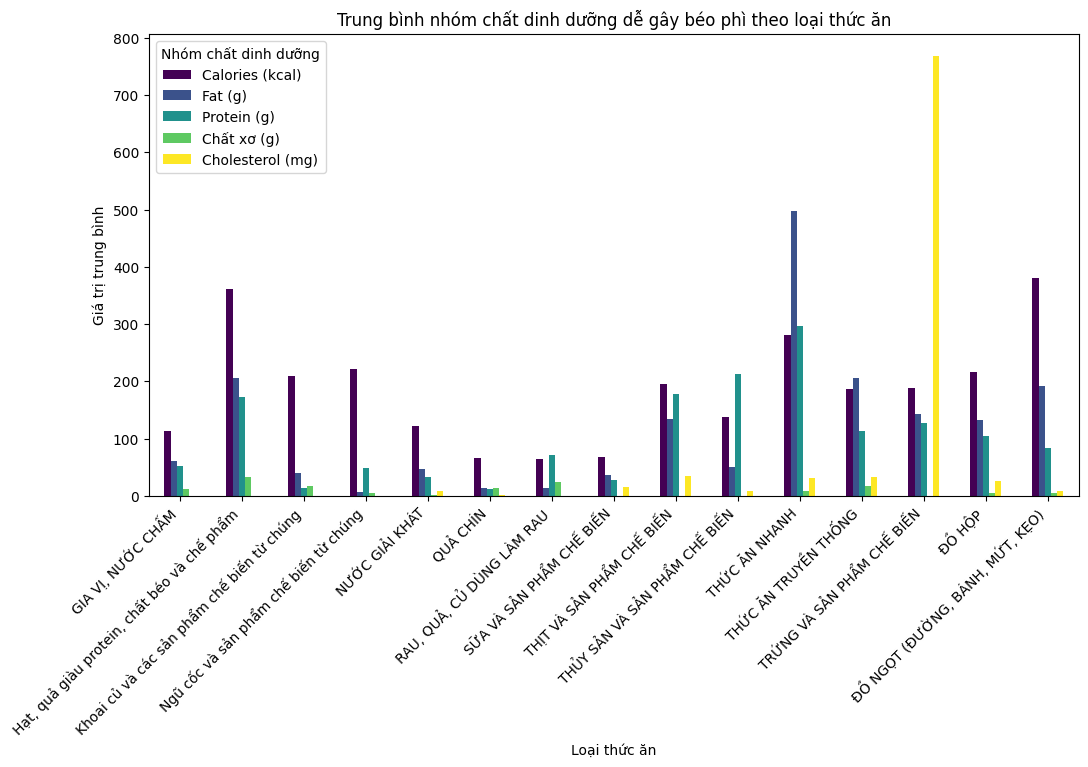

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chọn các cột liên quan đến năng lượng
energy_cols = ['Calories (kcal)', 'Fat (g)', 'Protein (g)', 'Chất xơ (g)', 'Cholesterol (mg)']

# Tính trung bình các chỉ số này theo nhóm 'Loại'
df_energy_avg = df.groupby('Loại')[energy_cols].mean().reset_index()

# Vẽ biểu đồ dạng cột cho từng nhóm chất
df_energy_avg.set_index('Loại').plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Thêm tiêu đề và nhãn
plt.title("Trung bình nhóm chất dinh dưỡng dễ gây béo phì theo loại thức ăn")
plt.xlabel("Loại thức ăn")
plt.ylabel("Giá trị trung bình")
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục X cho dễ đọc
plt.legend(title="Nhóm chất dinh dưỡng")
plt.show()


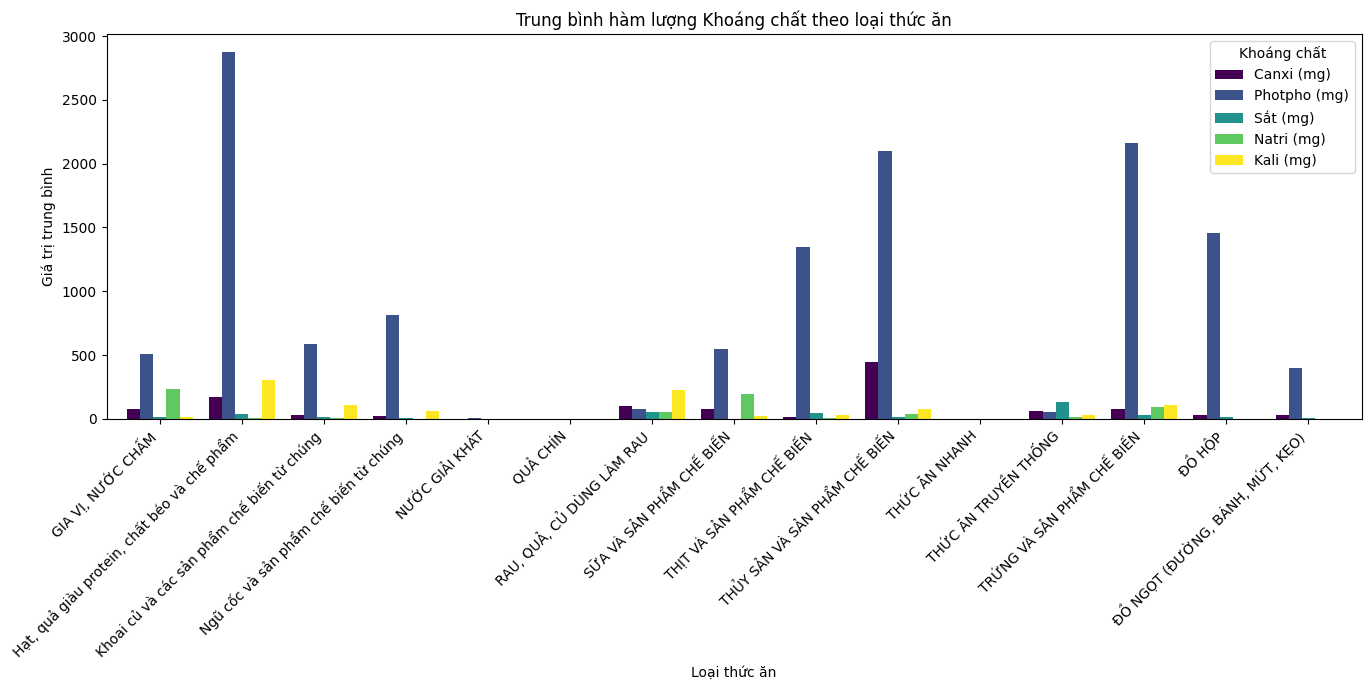

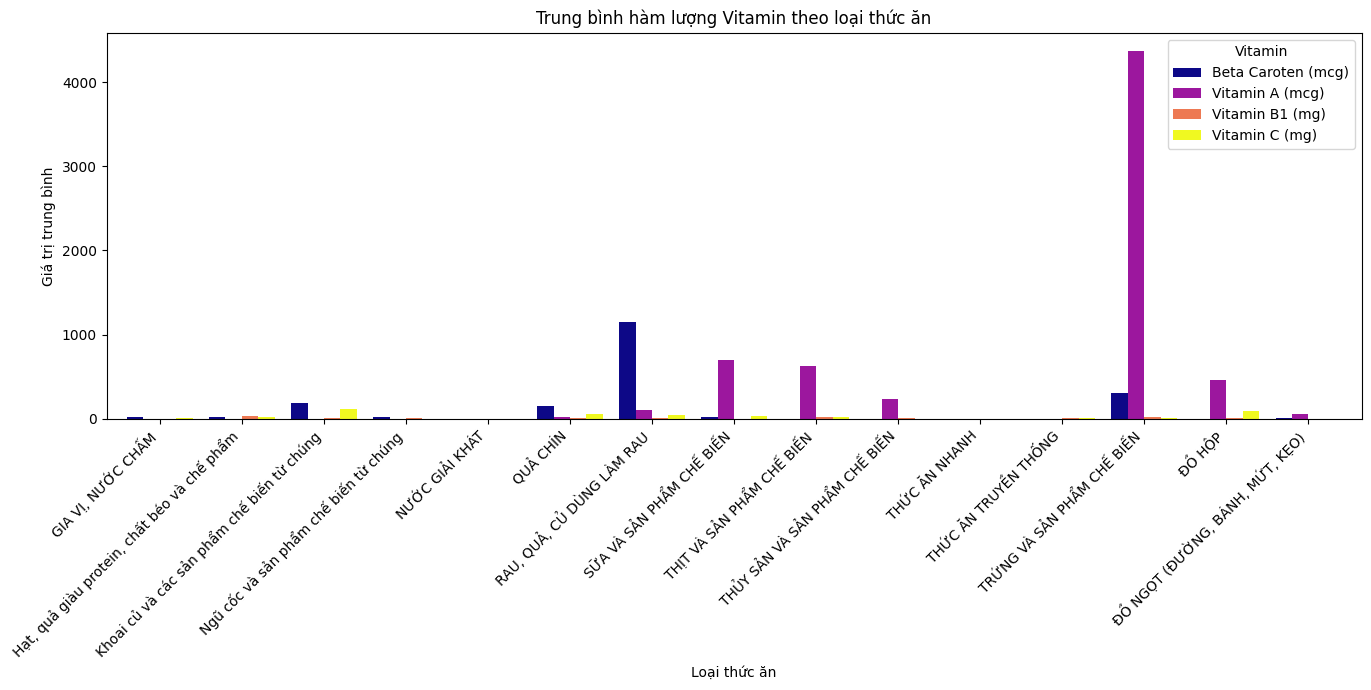

In [ ]:
import matplotlib.pyplot as plt

# Tạo danh sách các nhóm khoáng chất và vitamin
mineral_cols = ['Canxi (mg)', 'Photpho (mg)', 'Sắt (mg)', 'Natri (mg)', 'Kali (mg)']
vitamin_cols = ['Beta Caroten (mcg)', 'Vitamin A (mcg)', 'Vitamin B1 (mg)', 'Vitamin C (mg)']

# Tính trung bình cho các nhóm khoáng chất và vitamin theo 'Loại'
df_mineral_avg = df.groupby('Loại')[mineral_cols].mean().reset_index()
df_vitamin_avg = df.groupby('Loại')[vitamin_cols].mean().reset_index()

# Vẽ biểu đồ cột nhóm cho khoáng chất
df_mineral_avg.set_index('Loại')[mineral_cols].plot(kind='bar', figsize=(14, 7), colormap='viridis', width=0.8)
plt.title("Trung bình hàm lượng Khoáng chất theo loại thức ăn")
plt.xlabel("Loại thức ăn")
plt.ylabel("Giá trị trung bình")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Khoáng chất")
plt.tight_layout()
plt.show()

# Vẽ biểu đồ cột nhóm cho vitamin
df_vitamin_avg.set_index('Loại')[vitamin_cols].plot(kind='bar', figsize=(14, 7), colormap='plasma', width=0.8)
plt.title("Trung bình hàm lượng Vitamin theo loại thức ăn")
plt.xlabel("Loại thức ăn")
plt.ylabel("Giá trị trung bình")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Vitamin")
plt.tight_layout()
plt.show()


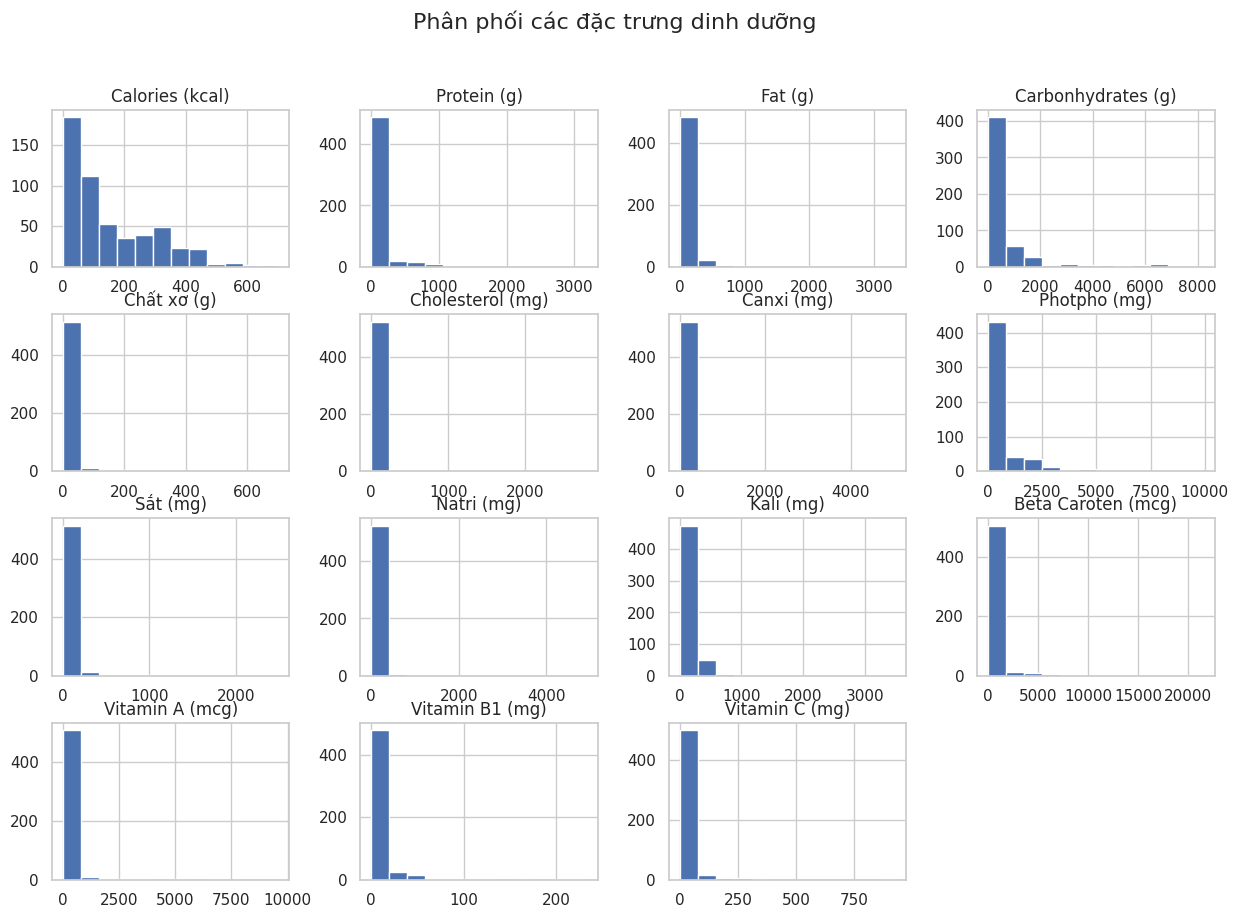

In [ ]:

sns.set(style="whitegrid")
# Biểu đồ hiển thị các đặc trưng dinh dưỡng, chia mỗi cột là 20 khoảng với kích thước biểu đồ 15x10
df[cols_to_convert].hist(bins=12, figsize=(15, 10))
plt.suptitle('Phân phối các đặc trưng dinh dưỡng', fontsize=16)
plt.show()

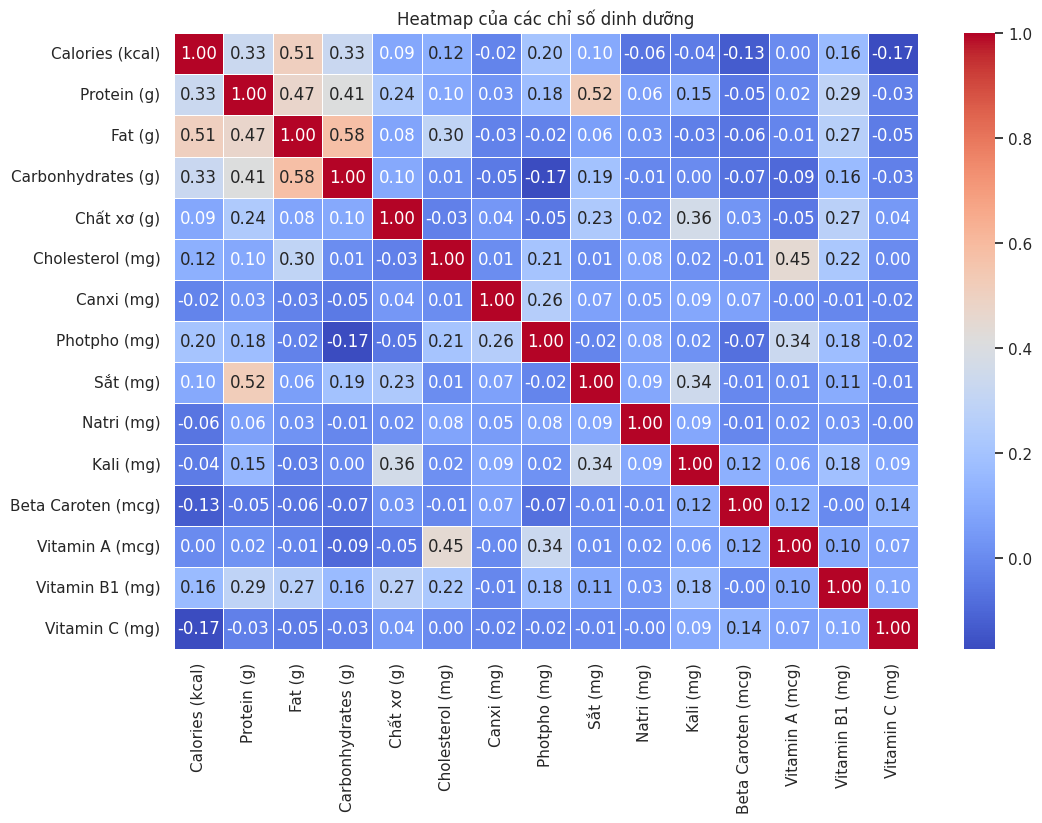

In [ ]:
# Vẽ biểu đồ nhiệt
plt.figure(figsize=(12, 8))
sns.heatmap(df[cols_to_convert].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Hiển thị biểu đồ
plt.title("Heatmap của các chỉ số dinh dưỡng")
plt.show()

# Normalize Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# cols_to_convert = ["Calories (kcal)", "Protein (g)", "Fat (g)", "Carbonhydrates (g)", "Chất xơ (g)", "Cholesterol (mg)"]

# Chọn các cột số học từ DataFrame
X = df[cols_to_convert]
label_encoder = LabelEncoder()
cols = X.columns

# Chuẩn hóa dữ liệu số
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=[cols])

print(X_scaled)

    Calories (kcal) Protein (g)   Fat (g) Carbonhydrates (g) Chất xơ (g)  \
0          0.493581    0.027010  0.004514           0.090953    0.008559   
1          0.490728    0.024812  0.003009           0.092532    0.005706   
2          0.279601    0.012877  0.006921           0.048087    0.017118   
3          0.312411    0.019158  0.001505           0.057681    0.007133   
4          0.475036    0.012563  0.000602           0.095811    0.007133   
..              ...         ...       ...                ...         ...   
528        0.405136    0.290515  0.021968           0.008865    1.000000   
529        0.039943    0.003455  0.000903           0.006315    0.031384   
530        0.052782    0.083543  0.008727           0.094839    0.038516   
531        0.024251    0.038003  0.009630           0.037766    0.001427   
532        0.021398    0.032349  0.002107           0.039830    0.000000   

    Cholesterol (mg) Canxi (mg) Photpho (mg)  Sắt (mg) Natri (mg) Kali (mg)  \
0       

# Kmeans

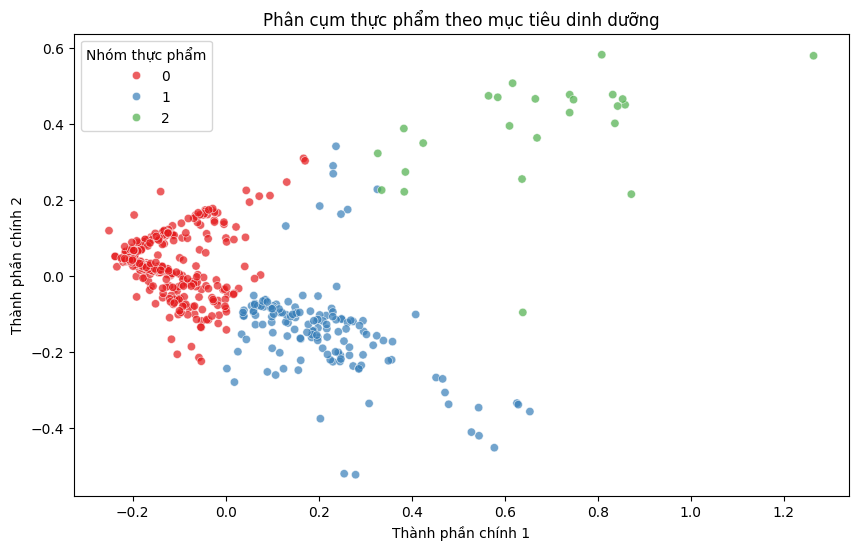

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

df_pca = df.copy()

from sklearn.decomposition import PCA
# Giảm chiều dữ liệu bằng PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca["PCA1"] = X_pca[:, 0]
df_pca["PCA2"] = X_pca[:, 1]

# Vẽ biểu đồ scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca["PCA1"], y=df_pca["PCA2"], hue=y_kmeans, palette="Set1", alpha=0.7)
plt.title("Phân cụm thực phẩm theo mục tiêu dinh dưỡng")
plt.xlabel("Thành phần chính 1")
plt.ylabel("Thành phần chính 2")
plt.legend(title="Nhóm thực phẩm")
plt.show()


Thiết lập lại nhãn cho cụm

In [ ]:
cluster_to_meal_time = {
    0: 'Calo thấp',  # Cụm 0 là calo thấp
    1: 'Calo trung bình',  # Cụm 1 là calo trung bình
    2: 'Calo cao'  # Cụm 2 là calo cao
}
y_meal_time = [cluster_to_meal_time[cluster] for cluster in y_kmeans]
X = df[cols_to_convert]
y = y_meal_time

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

       Calo cao       1.00      1.00      1.00         4
      Calo thấp       0.99      1.00      0.99        71
Calo trung bình       1.00      0.97      0.98        32

       accuracy                           0.99       107
      macro avg       1.00      0.99      0.99       107
   weighted avg       0.99      0.99      0.99       107



# DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Initialize an empty list to store results
decision_tree_results = []

best_model = None
best_score = 0
best_max_depth = 0

# Loop through max_depth values from 1 to 10
for depth in range(1, 11):
    # Initialize the Decision Tree model with the current max_depth value
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Get classification report metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    # Extract precision, recall, and F1-score for the 'weighted avg' (overall metrics)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']

    # Append results to the list
    decision_tree_results.append([f"Decision Tree (Max Depth={depth})", accuracy, precision, recall, f1_score])

    # Save the best model
    if accuracy > best_score:
        best_score = accuracy
        best_model = model
        best_max_depth = depth

# Convert the results into a DataFrame for better presentation
df_decision_tree = pd.DataFrame(decision_tree_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

# Display the result as a table
print("\nDecision Tree Classification Results")
print(df_decision_tree)

# Print the best model information
print(f"\nBest Max Depth: {best_max_depth}, Best Accuracy: {best_score:.4f}")

# Print the classification report for the best model
best_y_pred = best_model.predict(X_test)
print("\nClassification Report for Best Model:")
print(classification_report(y_test, best_y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Decision Tree Classification Results
                          Model  Accuracy  Precision    Recall  F1 Score
0   Decision Tree (Max Depth=1)  0.943925   0.909253  0.943925  0.926213
1   Decision Tree (Max Depth=2)  0.990654   0.990784  0.990654  0.990613
2   Decision Tree (Max Depth=3)  0.962617   0.964396  0.962617  0.954805
3   Decision Tree (Max Depth=4)  0.981308   0.981438  0.981308  0.980674
4   Decision Tree (Max Depth=5)  0.981308   0.981438  0.981308  0.980674
5   Decision Tree (Max Depth=6)  0.981308   0.981438  0.981308  0.980674
6   Decision Tree (Max Depth=7)  0.981308   0.981438  0.981308  0.980674
7   Decision Tree (Max Depth=8)  0.981308   0.981438  0.981308  0.980674
8   Decision Tree (Max Depth=9)  0.981308   0.981438  0.981308  0.980674
9  Decision Tree (Max Depth=10)  0.981308   0.981438  0.981308  0.980674

Best Max Depth: 2, Best Accuracy: 0.9907

Classification Report for Best Model:
                 precision    recall  f1-score   support

       Calo cao     

# KNN với Kfold

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# K-Fold Cross Validation (K=10)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize list for K values
k_values = [3, 5, 7]
models_results = []

# Initialize variables to store the best model and score
best_model = None
best_score = 0

# Loop to test different K values
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train, y_train, cv=kf, scoring='accuracy')
    precision_scores = cross_val_score(knn_model, X_train, y_train, cv=kf, scoring='precision_macro')  # Use 'precision_macro' for multi-class
    recall_scores = cross_val_score(knn_model, X_train, y_train, cv=kf, scoring='recall_macro')  # Use 'recall_macro' for multi-class
    f1_scores = cross_val_score(knn_model, X_train, y_train, cv=kf, scoring='f1_macro')  # Use 'f1_macro' for multi-class

    avg_score = np.mean(scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)
    models_results.append((k, avg_score, avg_precision, avg_recall, avg_f1))

    # Save the best model based on accuracy
    if avg_score > best_score:
        best_score = avg_score
        best_model = knn_model

# Sort models by accuracy and select top 3
best_models = sorted(models_results, key=lambda x: x[1], reverse=True)[:3]

# Hiển thị kết quả KNN với Cross Validation
print("\nKNN Classification with K-Fold Cross Validation")
results_summary = pd.DataFrame({
    "Model": [f"KNN (K={model[0]})" for model in best_models],
    "Accuracy": [model[1] for model in best_models],
    "Precision": [model[2] for model in best_models],
    "Recall": [model[3] for model in best_models],
    "F1 Score": [model[4] for model in best_models]
})

print(results_summary)

# Best accuracy based on cross-validation (e.g., 0.903654 for K=3)
best_k = best_models[0][0]
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train, y_train)

# Predict and calculate metrics for the best model
y_pred = best_knn_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred)  # Accuracy on the test set

print(f"\nBest KNN Model: KNN (K={best_k})")
print(f"Best Accuracy (Cross-Validation): {best_models[0][1]:.4f}")  # Display cross-validation accuracy

# Print the classification report for the best model
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



KNN Classification with K-Fold Cross Validation
       Model  Accuracy  Precision    Recall  F1 Score
0  KNN (K=3)  0.903654   0.921593  0.871094  0.886712
1  KNN (K=5)  0.884773   0.861875  0.823484  0.832914
2  KNN (K=7)  0.875415   0.820540  0.781713  0.790789

Best KNN Model: KNN (K=3)
Best Accuracy (Cross-Validation): 0.9037

Classification Report for Best Model:
                 precision    recall  f1-score   support

       Calo cao       1.00      0.75      0.86         4
      Calo thấp       0.89      0.99      0.93        71
Calo trung bình       0.92      0.72      0.81        32

       accuracy                           0.90       107
      macro avg       0.94      0.82      0.87       107
   weighted avg       0.90      0.90      0.89       107



# Naive Baives

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.naive_bayes import GaussianNB
# Phân lớp bằng Naive Bayes
print("Naive Bayes Classification")
# Xây dựng mô hình Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Dự đoán với tập dữ liệu predict
y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
report = classification_report(y_test, y_pred, target_names=['Calo cao', 'Calo thấp', 'Calo trung bình'])
print(report)

Naive Bayes Classification
Accuracy: 0.8598130841121495
Precision: 0.7184331797235023
Recall: 0.900968309859155
F1 Score: 0.7648973179216698
                 precision    recall  f1-score   support

       Calo cao       0.40      1.00      0.57         4
      Calo thấp       0.98      0.86      0.92        71
Calo trung bình       0.77      0.84      0.81        32

       accuracy                           0.86       107
      macro avg       0.72      0.90      0.76       107
   weighted avg       0.90      0.86      0.87       107



# Daily Calories for individuals

In [ ]:
import pandas as pd

# Hàm tính BMR (tỷ lệ trao đổi chất cơ bản) dành riêng cho nam và nữ
def compute_bmr_asian(gender, body_weight, body_height, age):
    if gender == 'male':
        return 66 + (13.7 * body_weight) + (5 * body_height) - (6.8 * age)
    elif gender == 'female':
        return 655 + (9.6 * body_weight) + (1.8 * body_height) - (4.7 * age)

# Hàm tính nhu cầu calo hàng ngày dựa trên mức độ vận động
def calculate_daily_calorie_needs(bmr, activity_level):
    activity_multipliers = {
        'ít vận động': 1.2,
        'vận động nhẹ': 1.375,
        'vận động vừa': 1.55,
        'vận động mạnh': 1.725,
        'vận động cực kỳ mạnh': 1.9
    }
    return bmr * activity_multipliers[activity_level]

# Hàm tính BMI và phân loại tình trạng cơ thể (thang đo dành cho người Châu Á)
def calculate_bmi_asian(body_weight, body_height):
    height_in_meters = body_height / 100  # Chuyển cm sang mét
    bmi = body_weight / (height_in_meters ** 2)
    return bmi

def classify_bmi_asian(bmi):
    if bmi < 18.5:
        return "Nhẹ cân"
    elif 18.5 <= bmi <= 24.99:
        return "Bình thường"
    elif 25 <= bmi <= 25:
        return "Thừa cân"
    elif 25 <= bmi <= 29.99:
        return "Béo phì cấp độ I"
    else:  # BMI >= 30
        return "Béo phì cấp độ II"

# Thông tin người dùng
user_gender = 'female'
user_weight = 60  # kg
user_height = 160  # cm
user_age = 20
user_activity_level = 'vận động mạnh'
user_goal = 'Giảm'

# Tính BMR và nhu cầu calo hàng ngày
bmr = compute_bmr_asian(user_gender, user_weight, user_height, user_age)
daily_calories = calculate_daily_calorie_needs(bmr, user_activity_level)

# Chia lượng calo cho ba bữa ăn
breakfast_calories = daily_calories * 0.3
lunch_calories = daily_calories * 0.4
dinner_calories = daily_calories * 0.3

# Tính BMI và phân loại tình trạng cơ thể
bmi = calculate_bmi_asian(user_weight, user_height)
bmi_category = classify_bmi_asian(bmi)

# Xuất kết quả
print(f"Tình trạng cơ thể (BMI): {bmi:.2f} ({bmi_category})")
print(f"BMR (Tỷ lệ trao đổi chất cơ bản): {bmr:.2f} kcal/ngày")
print(f"Tổng Calories cần mỗi ngày: {daily_calories:.2f} kcal")
print(f"Buổi sáng: {breakfast_calories:.2f} kcal")
print(f"Buổi trưa: {lunch_calories:.2f} kcal")
print(f"Buổi chiều: {dinner_calories:.2f} kcal")


Tình trạng cơ thể (BMI): 23.44 (Bình thường)
BMR (Tỷ lệ trao đổi chất cơ bản): 1425.00 kcal/ngày
Tổng Calories cần mỗi ngày: 2458.12 kcal
Buổi sáng: 737.44 kcal
Buổi trưa: 983.25 kcal
Buổi chiều: 737.44 kcal


Diet recommendation

In [ ]:
import random
from sklearn.tree import DecisionTreeClassifier

# Train mô hình dự đoán loại calo
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X_train, y_train)
meal_predictions = model.predict(X)
print(model)

# Gán loại calo cho từng món ăn dựa trên cluster
df['Calorie Type'] = [cluster_to_meal_time[cluster] for cluster in y_kmeans]

# Hàm lọc món ăn theo mục tiêu
def filter_meals_by_goal(df, goal):
    if goal == 'Tăng cân':
        return df[df['Calorie Type'].isin(['Calo cao', 'Calo trung bình'])]
    elif goal == 'Giảm cân':
        return df[df['Calorie Type'].isin(['Calo thấp'])]
    elif goal == 'Duy trì':
        return df[df['Calorie Type'].isin(['Calo cao', 'Calo trung bình', 'Calo thấp'])]
    return df

# Lọc món ăn phù hợp với mục tiêu của người dùng
filtered_df = filter_meals_by_goal(df, user_goal)

# Tính toán lượng calo mục tiêu cho từng bữa
daily_calories = 2000  # Tổng calo hàng ngày (ví dụ)
breakfast_calories = daily_calories * 0.3  # 30% tổng calo
lunch_calories = daily_calories * 0.4      # 40% tổng calo
dinner_calories = daily_calories * 0.3     # 30% tổng calo

# Hàm lọc món ăn theo bữa và lượng calo
def filter_meals_by_time(df, calorie_limit):
    # Lọc các món ăn có lượng calo phù hợp với bữa ăn
    return df[df['Calories (kcal)'] <= calorie_limit]

# Hàm chọn ngẫu nhiên món ăn từ danh sách đã lọc
def suggest_random_meal(df, calorie_limit, n=5):
    # Lọc món ăn theo lượng calo cho phép
    filtered = filter_meals_by_time(df, calorie_limit)
    # Chọn ngẫu nhiên n món ăn từ danh sách đã lọc
    return filtered.sample(n=min(n, len(filtered)))

# Lọc và gợi ý món ăn cho từng bữa
breakfast_suggestions = suggest_random_meal(filtered_df, breakfast_calories)
lunch_suggestions = suggest_random_meal(filtered_df, lunch_calories)
dinner_suggestions = suggest_random_meal(filtered_df, dinner_calories)

# In kết quả gợi ý món ăn
print("Gợi ý món ăn cho buổi sáng:")
print(breakfast_suggestions[['TÊN THỨC ĂN', 'Calories (kcal)', 'Calorie Type']])

print("\nGợi ý món ăn cho buổi trưa:")
print(lunch_suggestions[['TÊN THỨC ĂN', 'Calories (kcal)', 'Calorie Type']])

print("\nGợi ý món ăn cho buổi chiều:")
print(dinner_suggestions[['TÊN THỨC ĂN', 'Calories (kcal)', 'Calorie Type']])


DecisionTreeClassifier(max_depth=2, random_state=42)
Gợi ý món ăn cho buổi sáng:
                         TÊN THỨC ĂN  Calories (kcal)     Calorie Type
154                         Bánh quế              438  Calo trung bình
195        Cà phê sữa có kem pha sẵn              235  Calo trung bình
249          Chả giò tôm chay Vissan              156        Calo thấp
222  Gà rán KFC phần đùi lớn da giòn              179        Calo thấp
24                         Đậu phộng              573  Calo trung bình

Gợi ý món ăn cho buổi trưa:
                         TÊN THỨC ĂN  Calories (kcal)     Calorie Type
277                             Thơm               32        Calo thấp
191   Cà phê đen không đường pha sẵn                9        Calo thấp
426                      Hạt sen khô              342  Calo trung bình
489                  Tỏi tây (cả lá)               35        Calo thấp
221  Gà rán KFC phần đùi tỏi da giòn              170        Calo thấp

Gợi ý món ăn cho buổi chiều:
        

Custom Diet

In [ ]:
import pandas as pd

# Nhập thông tin món ăn từ người dùng
ten_mon_an = "Mì hảo hảo chua cay ngon"
calories = 10
protein = 100
fat = 20
carbs = 0
fiber = 0
cholesterol = 30000
canxi = 0
photpho = 0
sat = 0
natri = 80
kali = 0
beta_caroten = 0
vitamin_a = 0
vitamin_b1 = 0
vitamin_c = 0

# Tạo DataFrame từ món ăn mới
new_meal = pd.DataFrame({
    'Calories (kcal)': [calories],
    'Protein (g)': [protein],
    'Fat (g)': [fat],
    'Carbonhydrates (g)': [carbs],
    'Chất xơ (g)': [fiber],
    'Cholesterol (mg)': [cholesterol],
    'Canxi (mg)': [canxi],
    'Photpho (mg)': [photpho],
    'Sắt (mg)': [sat],
    'Natri (mg)': [natri],
    'Kali (mg)': [kali],
    'Beta Caroten (mcg)': [beta_caroten],
    'Vitamin A (mcg)': [vitamin_a],
    'Vitamin B1 (mg)': [vitamin_b1],
    'Vitamin C (mg)': [vitamin_c],
})

# Dự đoán bữa ăn bằng mô hình Random Forest
predicted_calo = model.predict(new_meal)[0]

# In kết quả
print(f"\nMón ăn '{ten_mon_an}' được xem là bữa: {predicted_calo}")



Món ăn 'Mì hảo hảo chua cay ngon' được xem là bữa: Calo trung bình


In [ ]:
group_0 = df[df['Calorie Type'] == 'Calo thấp']  # Lọc nhóm 0
group_1 = df[df['Calorie Type'] == 'Calo trung bình']  # Lọc nhóm 0
group_2 = df[df['Calorie Type'] == 'Calo cao']  # Lọc nhóm 0
print("Nhóm 1")
print(group_0.describe())
print("Nhóm 2")
print(group_1.describe())
print("Nhóm 3")
print(group_2.describe())

Nhóm 1
       Calories (kcal)  Protein (g)     Fat (g)  Carbonhydrates (g)  \
count       363.000000   363.000000  363.000000          363.000000   
mean         70.275482    67.953168   25.867769          372.024793   
std          47.340323   104.940238   56.444899          627.767761   
min           0.000000     0.000000    0.000000            0.000000   
25%          30.500000     9.000000    0.000000           19.500000   
50%          56.000000    24.000000    7.000000           78.000000   
75%          99.500000    95.000000   31.000000          382.500000   
max         208.000000   966.000000  587.000000         4077.000000   

       Chất xơ (g)  Cholesterol (mg)   Canxi (mg)  Photpho (mg)    Sắt (mg)  \
count   363.000000        363.000000   363.000000    363.000000  363.000000   
mean      8.931129          7.644628    84.732782    349.223140   32.239669   
std      14.665824         42.659229   380.134234    732.432542   61.034275   
min       0.000000          0.000000 